# characters
Character tracking is another key goal of *Moviegoer*. We can identify and compile information on individual characters. We'll keep looking at the romantic comedy *Plus One* (2019).

In [1]:
import sys
sys.path.append('../unifying_features')
sys.path.append('../data_serialization')
from serialization_preprocessing_io import *
from time_reference_io import *
from scene_identification_io import *
from scene_details_io import *
from character_identification_io import *
from character_details_io import *
nlp = spacy.load('en')

In [2]:
film = 'plus_one_2019'
srt_df, subtitle_df, sentence_df, vision_df, face_df = read_pickle(film)
scene_dictionaries = generate_scenes(vision_df, face_df, substantial_minimum=4, anchor_search=8)
character_dictionaries = generate_characters(scene_dictionaries)

# Character Identification

We were able to identify two main characters. This makes sense — *Plus One* is a romantic comedy. We identify them by their faces, and can place them in the scenes we've previously identified.

In [3]:
character_dictionaries

{1: {'character_id': 1,
  'face_clusters': [0.0, 3.0, 11.0, 13.0, 17.0, 31.0],
  'scenes_present': [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18]},
 2: {'character_id': 2,
  'face_clusters': [2.0, 7.0, 8.0, 10.0, 22.0],
  'scenes_present': [2, 3, 4, 5, 7, 10, 11, 12, 13, 14, 16, 17, 18]}}

## Demographic Information
We can use facial recognition models to find a best-guess at a character's age, race, and gender. We'll look at the character of Ben, played by the actor Jack Quaid.

In [4]:
chosen_character = character_dictionaries[1]
character_face_clusters = chosen_character['face_clusters']

To choose an appropriate frame to run the facial recognition, we have to find the frame where his face is biggest. In the chosen frame, his face takes up 12.8% of the frame. 

In [5]:
get_biggest_face_frame(character_face_clusters, face_df)

593

Because of memory constraints, the facial recognition model won't fit in this Jupyter Notebook. You'll have to trust me on the output. It predicted that the character of Ben is white, male, and 31 years old. The actor Jack Quaid is indeed white, male, but 28 years old. Still, not a bad guess.

## Emotion Tracking
Since we'll eventually be identifying what causes characters' emotional changes, we want to track their emotions throughout the entire film. We can recognize their face across the film, and assign one of seven emotions. These are Charles Darwin's six core emotions: Happy, Sad, Angry, Surprised, Fearful, and Disgusted; we also add Neutral.

In [6]:
face_df.p_emotion.value_counts()

sad         1038
neutral      664
fear         452
happy        354
angry        207
surprise      48
disgust        3
Name: p_emotion, dtype: int64

In practice, we mostly only see emotions categorized as Sad, Neutral, Fearful, Angry, and Happy. We group together the emotions Sad and Angry into one category called "upset". Whenever we see a character Upset, we assume they're in emotional distress. We can plot these Upset emotions across the film. A film can be divided into eight sequences (a more granular version of the three act structure), so for now, we'll plot these Upset emotions across eight equal durations.

This plot roughly tracks the traditional three act structure. Most of the drama happens at the climax near the end of the film, before culminating in a happy ending.

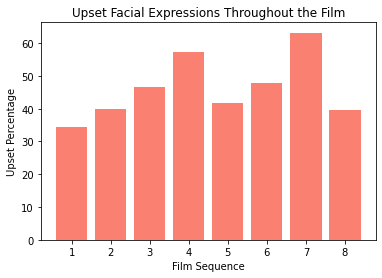

In [7]:
plot_character_filmwide_emotion(character_face_clusters, face_df)

## Dialogue Attribution
Attribution of dialogue to their speakers is a key step in understanding characters' plot and motivations. However, the results are a little shaky. The algorithm attributes dialogue by determining who's onscreen with their mouth open when a line is delivered, and this isn't always accurate.

The remainder of this notebook contains dialogue possibly attributed to Ben.

In [8]:
display_character_dialogue_context(character_face_clusters, sentence_df, nlp)

----------------
Direct questions
----------------
That makes it sadder, you know?
When were you gonna tell me?
Hey, Mr. Ricciardi, how are you?
Do you have one yet?
Are you gonna spend the rest of your life moping about Nate?
Have you ever heard of such a thing?
Do you have any rooms available?
How you doing, dude?
Do you hate Gina?
How did you get in here?
What do you mean, that's it?
Why do you want this so much?
Are you afraid of strong women?
Can you tell your girlfriend to keep it down?
Did you get that?
Do you need to use the girls' room?
Can you maybe not assault this one?
I just don't think my heart's in this anymore, you know?

-------------------------------------
Possible important terms, noun groups
-------------------------------------
['Ben', 'Alice', 'fun', 'Jess Ramsey', 'Gina']

-------------------------
First-person declarations
-------------------------
And plus, I got someone to look forward to.
I don't like my room.
I'm the best man, so I'm a little busy.
Alice, I